# EXPLORATORY DATA ANALYSIS

#### MEXICO'S PUBLIC EMPLOYEMENT MATCHING MOTOR

In [1]:
from src.utils.eda_functions import *

In [2]:
conn = get_db_conn('../conf/local/credentials.yaml')

### Table of Contents

* [Section 1: Job Seekers Skills](#job_seeker_skills)
* [Section 2: Job Vacancies Description](#job_vacancy_description)



<a id=’job_seeker_skills’></a>
## Section 1: Job Seekers Skills <a class="anchor" id="job_seeker_skills"></a>

For details regarding job vacancies, see [Section 2: Job Vacancies Description](#job_vacancy_description).

In [3]:
count_knowledges = \
"""
select 
    count(*)
from 
    clean.candidato_conocimiento_habilidad_text_lemmatization
"""

In [4]:
print(f"Number in registered entries in knowledge column:  {pd.read_sql(count_knowledges, conn)['count'][0]:,}")

Number in registered entries in knowledge column:  10,259,132


In [5]:
normalized_knowledges = \
"""
select 
    *
from 
    clean.candidato_conocimiento_habilidad_text_lemmatization 
"""

In [6]:
normalized_knowledges = pd.read_sql(normalized_knowledges, conn)

In [7]:
normalized_knowledges

id_bt    conocimientoherramienta_bt  \
0           11913                         venta   
1           11914  supervisor personal limpieza   
2           11915                                 
3           11916                                 
4           11917                         venta   
...           ...                           ...   
10259127  2119508                   almacenista   
10259128  8003550            computacion social   
10259129  5526077                      feriante   
10259130  7743355                                 
10259131  7743355                      question   

                                                descripcion  
0         realizar liquidacion venta ruta realizacion re...  
1         supervicion centro servicio atencion personal ...  
2         pues experiencia contadorio poder hacer balanc...  
3         ginza automotor desarrollar siguiente activida...  
4         reclutamiento seleccion induccion personal obr...  
...                                                     ...  
10259127  manejo inventario recepcion mercancia manejo c...  
10259128                                                     
10259129                                           feriante  
10259130                                   paquete completo  
10259131                herramienta hacer encuesta internet  

[10259132 rows x 3 columns]

In [8]:
print(
    f"After cleaning and normalizing text listed by job seekers as knowledge, we are left with {normalized_knowledges[normalized_knowledges.conocimientoherramienta_bt!='']['conocimientoherramienta_bt'].count():,} observations, belonging to {len(normalized_knowledges[normalized_knowledges.conocimientoherramienta_bt!='']['id_bt'].unique()):,} unique job seekers."
)

After cleaning and normalizing text listed by job seekers as knowledge, we are left with 8,731,422 observations, belonging to 3,389,138 unique job seekers.


In [9]:
generate_word_counter(normalized_knowledges["conocimientoherramienta_bt"])

TOP 50 UNIGRAMS IN DATA


[('venta', 475166),
 ('general', 463450),
 ('manejo', 458368),
 ('ayudante', 362904),
 ('office', 360752),
 ('administrativo', 306508),
 ('atencion', 306040),
 ('computacion', 267344),
 ('operario', 235346),
 ('computadora', 207420),
 ('auxiliar', 206230),
 ('produccion', 199804),
 ('cliente', 183680),
 ('administracion', 177086),
 ('paqueteria', 151362),
 ('mantenimiento', 148364),
 ('chofer', 147368),
 ('equipo', 142516),
 ('limpieza', 136902),
 ('client', 131172),
 ('operador', 118538),
 ('seguridad', 117518),
 ('trabajo', 112130),
 ('microsoft', 105548),
 ('excel', 98610),
 ('personal', 95930),
 ('sistema', 92358),
 ('ninguno', 91674),
 ('tecnico', 89674),
 ('basico', 84488),
 ('almacir', 82152),
 ('area', 80856),
 ('cocina', 76686),
 ('dato', 75604),
 ('contabilidad', 74698),
 ('calidad', 73048),
 ('diseno', 72874),
 ('facilidad', 69536),
 ('word', 68642),
 ('autocad', 68640),
 ('servicio', 68254),
 ('herramienta', 65656),
 ('cajero', 63794),
 ('industrial', 59362),
 ('contable', 

WORD COUNT FOR CONOCIMIENTOHERRAMIENTA_BT


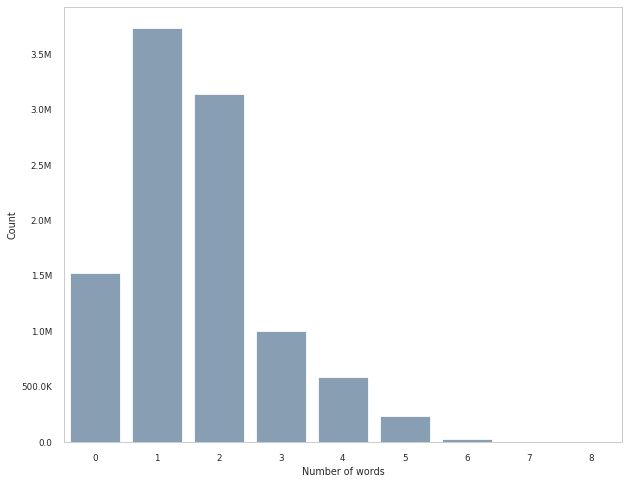

In [10]:
plot_n_word_frecuency(
    normalized_knowledges, 
    'conocimientoherramienta_bt',
    normalization='lemmatization'
)

TOP 50 BIGRAMS IN DATA


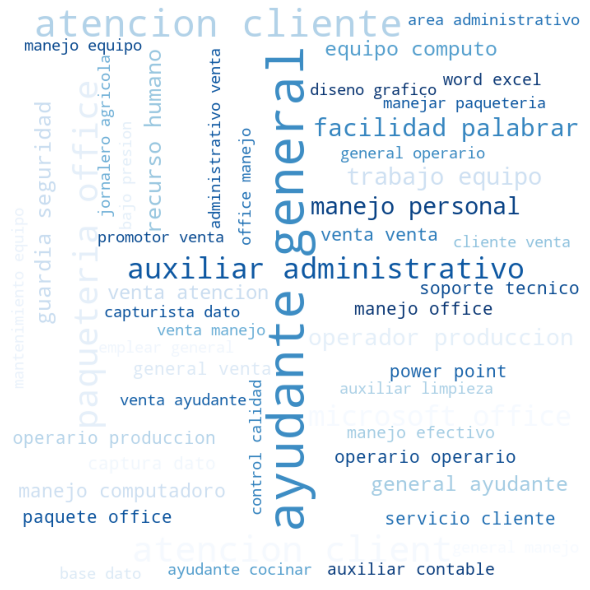

In [11]:
generate_wordcloud(
    normalized_knowledges,
    "conocimientoherramienta_bt",
    normalization='lemmatization'
)

<a id=’job_vacancy_description’></a>
## Section 2: Job Vacancies Description  <a class="anchor" id="job_vacancy_description"></a>

In [12]:
normalized_functions = \
"""
select 
    *
from 
    stps.oferta_empleo_text_lemmatization 
"""

In [13]:
normalized_functions = pd.read_sql(normalized_functions, conn)

In [14]:
normalized_functions

id_oe                     titulo_oe  \
0         452650  coordinador ventas bilinguir   
1         783805      vendedor infraestructura   
2         970894  supervisor obra construccion   
3        1247671             auxiliar limpieza   
4        1307172     auxiliar almacir material   
...          ...                           ...   
1254152  4348538                    subgerente   
1254153  4348542                     jardinero   
1254154  4348543             guardia seguridad   
1254155  4348544       auxiliar administrativo   
1254156  4348547              ayudante general   

                                              funciones_oe  
0        elaborar cotizacion presupuesto trato ingl cli...  
1        promocion ventar ampliacion obra proyecto infr...  
2        revision plano tipo material utilizar programa...  
3          limpieza general barrer trapear piso lavar bano  
4        conocimiento material fabricacion caja plegadi...  
...                                                    ...  
1254152  manejo personal atencion proveedor manejo estr...  
1254153  corte cesped mantenimiento planta flores arbus...  
1254154  rondin llenado bitacora control accesos sistem...  
1254155  encargado tienda funcion administrativo encarg...  
1254156  apoyar actividad varios envasado preparacion d...  

[1254157 rows x 3 columns]

In [15]:
print(
    f"After cleaning and normalizing text listed in job vacancies as functions required, we are left with {normalized_functions[normalized_functions.funciones_oe!='']['funciones_oe'].count():,} functions registered, belonging to {len(normalized_functions[normalized_functions.funciones_oe!='']['id_oe'].unique()):,} unique job vacancies."
)

After cleaning and normalizing text listed in job vacancies as functions required, we are left with 1,238,295 functions registered, belonging to 1,238,295 unique job vacancies.


In [16]:
generate_word_counter(
    normalized_functions["funciones_oe"],
)


TOP 50 UNIGRAMS IN DATA


[('atencion', 247695),
 ('cliente', 213254),
 ('manejo', 208144),
 ('mercancia', 135104),
 ('venta', 128664),
 ('area', 126966),
 ('client', 124571),
 ('realizar', 109066),
 ('producto', 106445),
 ('servicio', 106344),
 ('limpieza', 105011),
 ('control', 102907),
 ('personal', 88345),
 ('general', 83668),
 ('acomodo', 80704),
 ('trabajo', 74245),
 ('mantenimiento', 72708),
 ('elaboracion', 69468),
 ('inventario', 67295),
 ('apoyo', 59493),
 ('material', 58278),
 ('actividad', 57638),
 ('equipo', 53108),
 ('produccion', 46482),
 ('empresa', 44223),
 ('instalacion', 44186),
 ('report', 43907),
 ('carga', 43435),
 ('seguimiento', 43384),
 ('cobro', 43290),
 ('limpiezo', 39833),
 ('alimento', 37237),
 ('efectivo', 35411),
 ('caja', 35358),
 ('entregar', 34505),
 ('experiencia', 33999),
 ('administrativo', 32821),
 ('descargo', 31498),
 ('pedido', 30761),
 ('recepcion', 30705),
 ('corte', 30599),
 ('sistema', 30039),
 ('preparacion', 29192),
 ('credito', 28512),
 ('entrada', 28425),
 ('alma

In [17]:
normalized_functions['word_count'] = normalized_functions['funciones_oe'].str.split().map(len)

TOP 50 BIGRAMS IN DATA


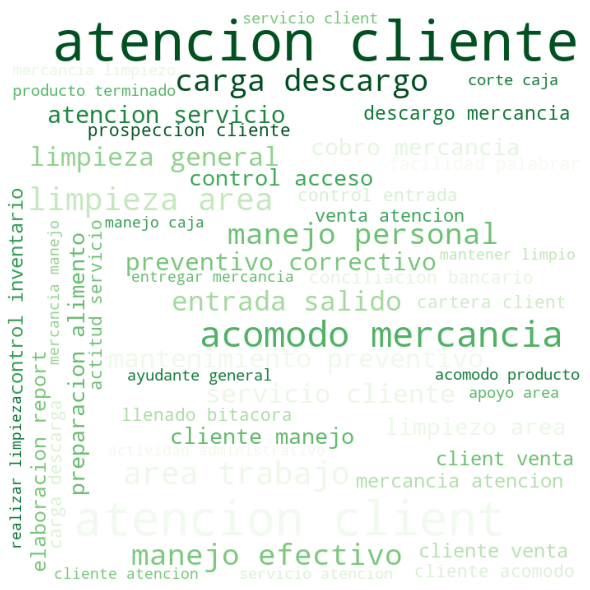

In [18]:
generate_wordcloud(
    normalized_functions,
    "funciones_oe",
    normalization='lemmatization',
    color='Greens_r'
)